In [95]:
from sympy import *
init_printing()

 Primero planteamos la desigualdad que se tiene que cumplir para que haya existencia de una trayectoria periódica
$$ \sum_{i<j}\frac{m_im_j}{\left|q_i-q_j\right|} <\left(\sum_{i=1}^{n}\frac{m_i}{|q_i|^3}\right)\left(\sum_{i=1}^{n}m_i|q_i|^2\right)$$ y queda lo siguiente

$$  \frac{\mu(1-\mu)}{1-x}+\frac{\mu(1-\mu)}{1+x}+\frac{\mu^2}{2}+\frac{(1-\mu)^1}{2x}+\frac{\mu(1-\mu)}{1+x}+\frac{\mu(1-\mu)}{1-x}<\left( \mu+\frac{1-\mu}{x^3}+\frac{1-\mu}{x^3}+\mu  \right) \left( \mu+(1-\mu)x^2+(1-\mu)x^2+\mu \right) $$


simplificando queda que

$$ \frac{2\mu(1-\mu)}{1-x} +\frac{2\mu(1-\mu)}{1+x}+\frac{\mu^2}{2}+\frac{(1-\mu)^2}{2x}<4\mu^2+4\mu(1-\mu)x^2+\frac{4\mu(1-\mu)}{x^3}+\frac{4(1-\mu)^2}{x}$$

Como $\frac{\mu^2}{2}<4\mu^2$ y $\frac{(1-\mu)^2}{2x}<\frac{4(1-\mu)^2}{x}$ (sin tener en cuenta el término $4\mu(1-\mu)x^2$) sólo quedaría demostrar que 

$$ \frac{2\mu(1-\mu)}{1-x} +\frac{2\mu(1-\mu)}{1+x}<\frac{4\mu(1-\mu)}{x^3}$$
y esto es equivalente a demostrar que

$$\frac{x^3}{1-x^2}<2$$

El lado izquierdo de la desigualdad anterior es una función creciente para $0<x<1$. Luego, si ponemos $x$ como función de $\mu$ y vemos que esta función $x(\mu)$ es decreciente, para $0<\mu<1$, entonces va a valer que  $$\frac{x(\mu)^3}{1-x(\mu)^2}<2,\qquad \text{para todo} \qquad 0<\mu<1$$  si vale que $$\frac{x(0)^3}{1-x(0)^2}<2$$




 Para demostrar que la función $x(\mu)$ es decreciente vamos a usar la ecuación que proviene del hecho que los cuerpos están en una configuración central, y que relaciona  $x$ con $\mu$. La ecuación es la siguiente: 

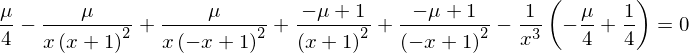

In [8]:
mu,x=symbols('mu,x',positive=True)
ec=mu/4+(1-mu)/(1+x)**2+(1-mu)/(1-x)**2-mu/x/(1+x)**2-(1-mu)/4/x**3+mu/x/(1-x)**2
Eq(ec)

Simplificando queda 

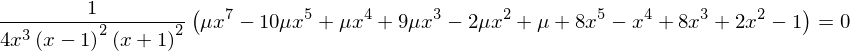

In [88]:
ec=ec.simplify()
ecuacion=Eq(ec)
ecuacion

Para que la expresión de arriba sea igual a cero el numerador tiene que ser igual a cero. Luego la relación que hay entre $x$ y $\mu$ es la siguiente

In [54]:
ecua=Eq(mu*x**7 - 10*mu*x**5 + mu*x**4 + 9*mu*x**3 - 2*mu*x**2 + mu + 8*x**5 - x**4 + 8*x**3 + 2*x**2 - 1)
ecua

Aplicando el teorema de la función implícita podemos hayar $\frac{dx}{d\mu}$

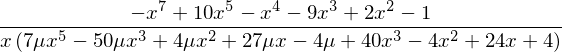

In [89]:
X=Function('X')(mu)
f1=(ecua.lhs).subs(x,X)
f1=f1.diff(mu)
f1
dx=solve(Eq(f1),X.diff(mu))[0]
dx
dx=dx.subs(X,x)
dx

<h3> Veamos que la derivada $\frac{dx}{d\mu}$ es siempre negativa <h3>

In [56]:
print(dx)

(-x**7 + 10*x**5 - x**4 - 9*x**3 + 2*x**2 - 1)/(x*(7*mu*x**5 - 50*mu*x**3 + 4*mu*x**2 + 27*mu*x - 4*mu + 40*x**3 - 4*x**2 + 24*x + 4))


Veamos primero que el numerador de $\frac{dx}{d\mu}$ es siempre negativo

In [57]:
num=-x**7 + 10*x**5 - x**4 - 9*x**3 + 2*x**2 - 1
num.factor()

In [85]:
#calculemos las raices del numerador
L=[num.diff(x,i).subs(x,0)/factorial(i) for i in range(8)]
L=L[::-1]
L
import numpy as np
sol=np.roots(L)
sol

array([ 2.94956549+0.j        , -3.04839961+0.j        ,
        1.00000000+0.j        , -1.00000000+0.j        ,
        0.27407809+0.41521363j,  0.27407809-0.41521363j, -0.44932206+0.j        ])

como las raices reales son $-3.0483999$, $-1$, $-0,449322$, $1$ y $2,94956549$ (además $1$ es una raiz exacta), entonces para valores de $x$ entre $0$ y $1$ el numerador no cambia de signo. Si evaluamos el numerador en $0$ nos da $-1$. Luego el numerador es siempre negativo.

Veamos ahora que el denominador de $\frac{dx}{d\mu}$ es siempre positivo

In [59]:
den=x*(7*mu*x**5 - 50*mu*x**3 + 4*mu*x**2 + 27*mu*x - 4*mu + 40*x**3 - 4*x**2 + 24*x + 4)
den

In [76]:
den.expand().collect(x).collect(mu)

In [87]:
#El denominador se puede reescribir dejando algunos términos multiplicados por \mu y otros multiplicados por 1-\mu
(7*mu*x**6 + x**4*(-40*mu + 40) -10*mu*x**4+ x**3*(4*mu - 4) + x**2*(-24*mu + 24) +51*mu*x**2+ x*(-4*mu + 4))

In [84]:
#y factorizando queda de esta forma
denn=7*mu*x**6-10*mu*x**4+40*x**4*(1-mu)-4*x**3*(1-mu)+51*x**2*mu+24*x**3*(1-mu)+4*x*(1-mu)
denn.collect(mu)

como los polinomios $7x^6-10x^4+51x^2=x^2(7x^4-10x^2+51)$ y $40x^4+20x^3+4x=x(40x^3+20x^2+4)$ son siempre positivos para $0<x<1$ entonces el denominador es siempre positivo.

<h4> Luego, como $\frac{dx}{d\mu}$ es siempre negativa, la función $x(\mu)$ es decreciente. Entonces $x(\mu)\leq x(0)$ para todo $0<\mu<1$. Luego $$\frac{x(\mu)^3}{1-x(\mu)^2}\leq\frac{x(0)^3}{1-x(0)^2} $$ <h4>

Probemos ahora que $$\frac{x(0)^3}{1-x(0)^2}<2.$$ La relación que hay entre $x$ y $\mu$ es la siguiente

In [90]:
ecua

In [92]:
#si sustituimos $\mu$ por $0$ entonces queda que
ecua.subs(mu,0)

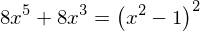

In [94]:
#esta ecuación se puede escribir de esta manera
Eq(8*(x**5+x**3),(x**2-1)**2)

Como $0<x<1$ entonces $0<8(x^5+x^3)<1$. Y luego, $$x^3<\frac{1}{8(x^2+1)}<\frac{1}{8}.$$ De esta última desigualdad tenemos que $$x^2<\frac{1}{8^{2/3}}, $$ lo que implica que $$\frac{1}{1-x^2}<\frac{1}{1-(\frac{1}{8})^{2/3}}.$$ Entonces
$$ \frac{x^3}{1-x^2}< \frac{1}{8}\frac{1}{1-(\frac{1}{8})^{2/3}}=\frac{1}{8-8^{1/3}}=\frac{1}{6}<2.$$ Que es lo que queríamos probar.